## **HR ANALYTICS**

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work) <br>
Plot bar charts showing impact of employee salaries on retention <br>
Plot bar charts showing corelation between department and employee retention <br>
Now build logistic regression model using variables that were narrowed down in step 1 <br>
Measure the accuracy of the model

In [8]:
# Import the necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [9]:
# Load the Dataset
hr = pd.read_csv('HR_comma_sep.csv')
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [13]:
hr.shape

(14999, 10)

**The dataset shows features that may lead to an employee leaving the company. <br> The target variable is the left column since I want to analyze what leads to most employees leaving the company**

In [10]:
# Datatypes
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


**A s observed, there are a total of 10 columns. <br> Total number of entries is 14999 therefore, no missing values in the dataset. <br> There are two categorical columns where one is norminal and the other is ordinal.**


### **Initial Exploratory Analysis**

In [14]:
# Data statistics
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


**Total count for all columns is 14999**

In [36]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [52]:
# histogram
def histogram(column):

    column_counts = hr[column].value_counts()

    fig, (ax_bar) = plt.subplots(figsize=(5, 4))

    # Bar chart
    ax_bar.bar(column_counts.index, column_counts.values)
    ax_bar.set_xlabel(column)
    ax_bar.set_ylabel('Count')
    ax_bar.set_xticks([0, 1])
    ax_bar.set_title(f'Distribution of the {column} column') 

    # Show the plot
    plt.show()

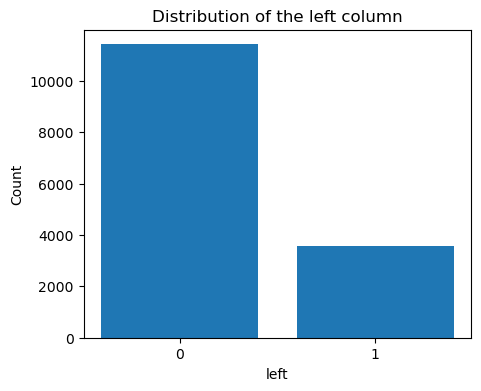

In [53]:
histogram('left')

**As observed, most of the employees retained in the company however, quite a number of them also left the company**

In [55]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [65]:
def plot_bar_charts(column_name, target_column):

    plt.figure(figsize=(20, 4))

    # Plot a bar chart for the specified column
    plt.subplot(1, 2, 1)
    sns.countplot(x=column_name, data=hr)
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.title(f'Bar Chart of {column_name}')

    # Plot a bar chart of the specified column vs. the target variable
    plt.subplot(1, 2, 2)
    sns.countplot(x=column_name, hue=target_column, data=hr)
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.title(f'{column_name} vs. {target_column}')

    plt.tight_layout()
    plt.show()

#### **The Department Column**

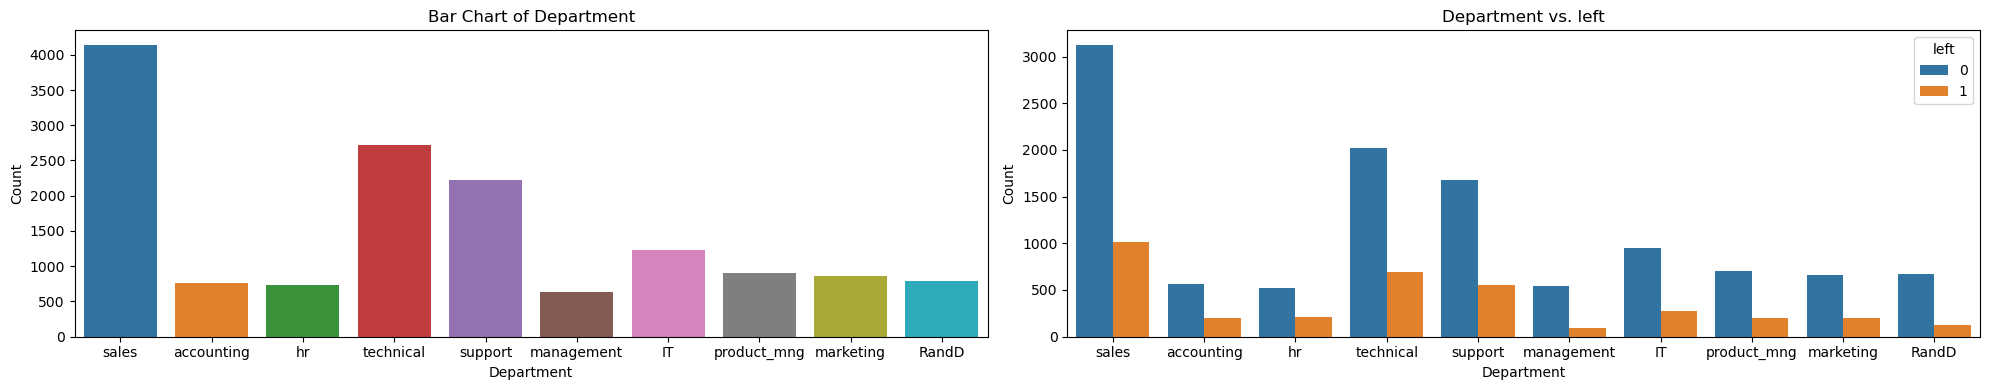

In [64]:
plot_bar_charts('Department', 'left')

**As observed, the sales department has rhe highest number of employees than any other. <br> In addition, the sales department also has the highest number of employees who left the company**

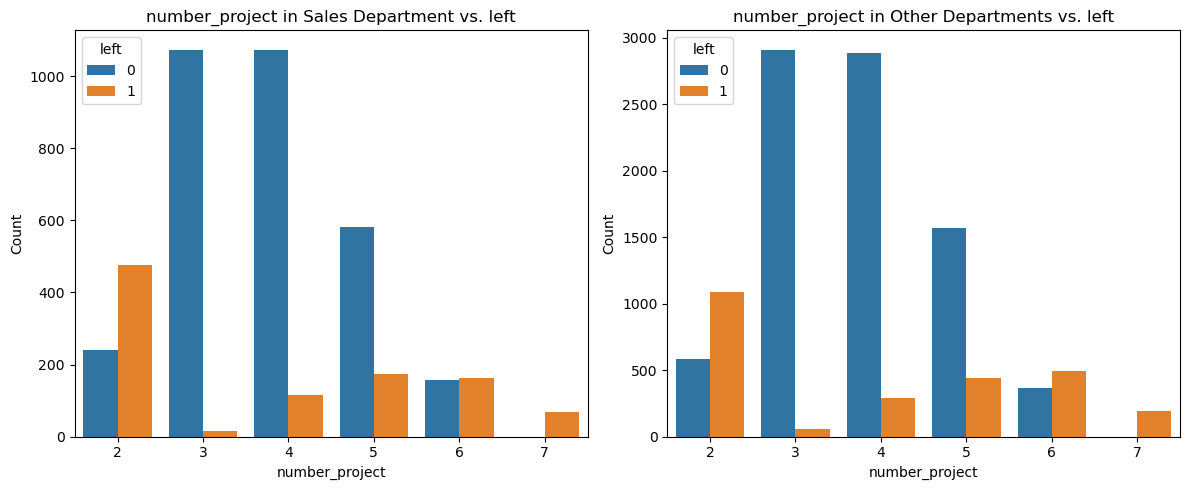

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_bar_charts_by_department(department_column, target_column, independent_column):
    """
    Plot bar charts for an independent variable (e.g., salary, satisfaction_level) for the 'Sales' department
    and compare it with other departments regarding employee turnover.

    Parameters:
        - data: DataFrame containing the dataset
        - department_column: Name of the department column
        - target_column: Name of the target variable column (e.g., 'left')
        - independent_column: Name of the independent variable column (e.g., 'salary', 'satisfaction_level')

    Returns:
        None (displays the plots)
    """
    plt.figure(figsize=(12, 5))

    # Filter the data for the 'Sales' department
    sales_data = hr[hr[department_column] == 'sales']

    # Plot a bar chart for the independent variable in the 'Sales' department
    plt.subplot(1, 2, 1)
    sns.countplot(x=independent_column, hue=target_column, data=sales_data)
    plt.xlabel(independent_column)
    plt.ylabel('Count')
    plt.title(f'{independent_column} in Sales Department vs. {target_column}')

    # Plot a bar chart for the independent variable in all other departments
    plt.subplot(1, 2, 2)
    other_data = hr[hr[department_column] != 'sales']
    sns.countplot(x=independent_column, hue=target_column, data=other_data)
    plt.xlabel(independent_column)
    plt.ylabel('Count')
    plt.title(f'{independent_column} in Other Departments vs. {target_column}')

    plt.tight_layout()
    plt.show()

# Example usage:
# Replace 'df' with your DataFrame and 'left' with your target variable name (e.g., 'left')
# Replace 'department' with the actual department column name
# Replace 'satisfaction_level' with the variable you want to investigate
plot_bar_charts_by_department('Department', 'left', 'number_project')


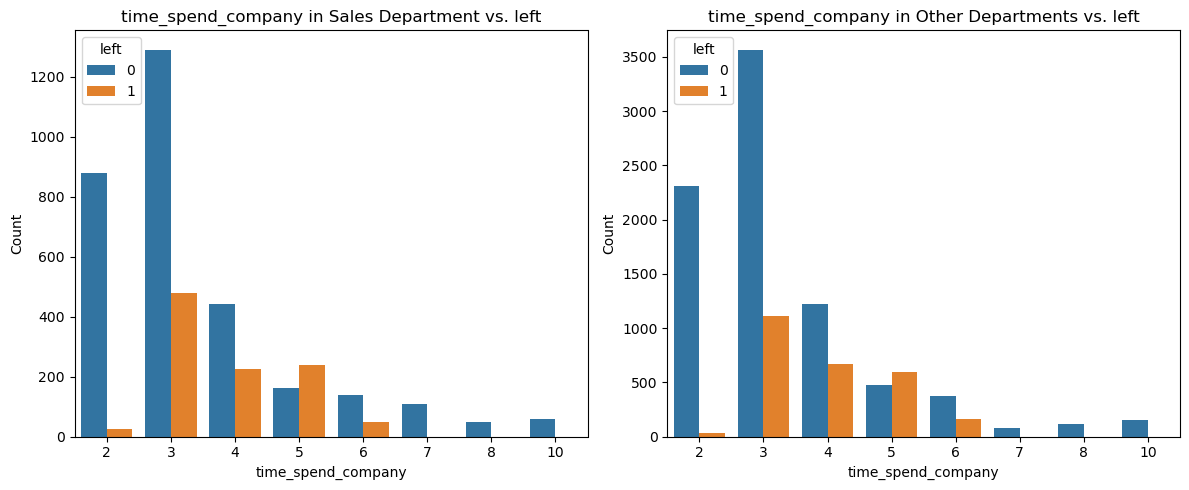

In [70]:
plot_bar_charts_by_department('Department', 'left', 'time_spend_company')


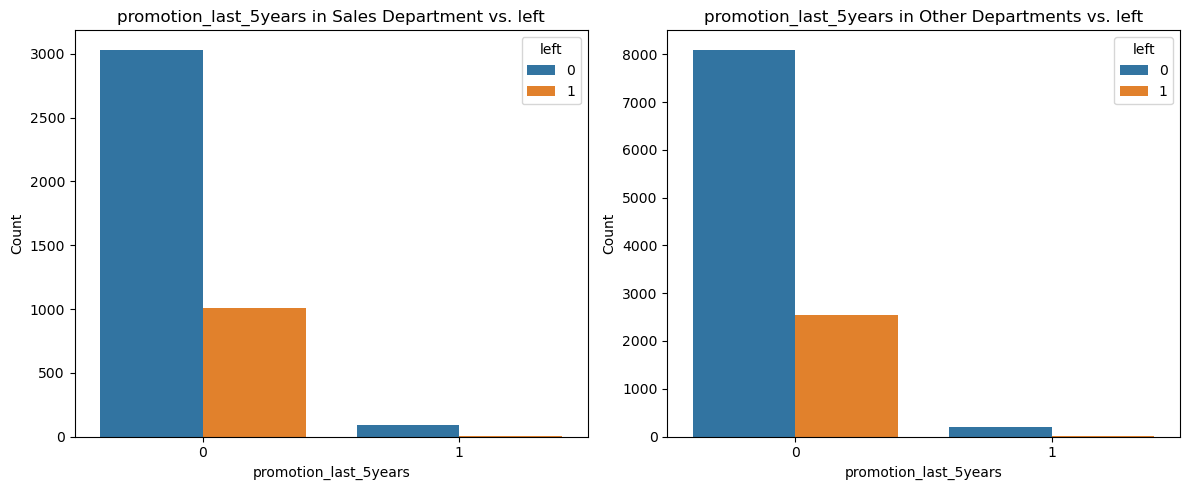

In [71]:
plot_bar_charts_by_department('Department', 'left', 'promotion_last_5years')


In [68]:
sales_data = hr[hr['Department'] == 'sales']
sales_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14967,0.43,0.51,2,128,3,0,1,0,sales,low
14968,0.40,0.47,2,128,3,0,1,0,sales,medium
14969,0.43,0.46,2,157,3,0,1,0,sales,medium
14970,0.78,0.93,4,225,5,0,1,0,sales,medium


#### **The Salary Column**

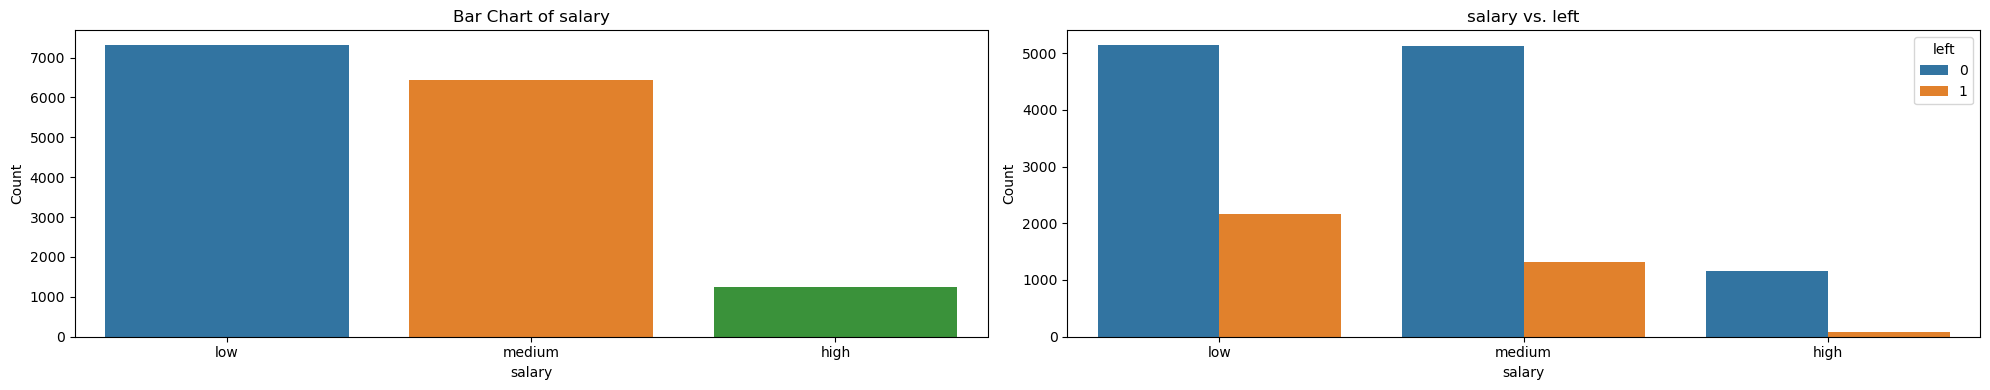

In [63]:
plot_bar_charts('salary', 'left')
